# Stability Analysis of the SMC for the Slung Load System 2D



In [75]:
from sympy import *
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting()

# Time and system variables
t, y1, y2, y3 = symbols('t y_1 y_2 y_3')

# Control parameters
lambda1, lambda2, lambda3, lambda4 = symbols('\tlambda_1' '\tlambda_2' '\tlambda_3''\tlambda_4')

# Physical parameters
m, M, l, g = symbols('m M l g')

# Original System Variables
theta, z_d, alpha_d = dynamicsymbols('\ttheta z_d \talpha_d')

zddot_d = diff(z_d,t,2)
alphadot_d = diff(alpha_d,t,1)
alphaddot_d = diff(alpha_d,t,2)

In [76]:
# System Transformation (z, alpha)
fz = -m*l*cos(alpha_d - y1)*(alphadot_d - y2)**2/(M+m) - g;
bz = (-m*sin(alpha_d - y1)*sin(theta - alpha_d +y1) + M*cos(theta))/(M*(M+m));

falpha = 0;
balpha = sin(theta - alpha_d + y1)/(M*l);

y1dot = y2
y3dot = -(lambda2*y3 + lambda3*y2 + lambda4*y1)/lambda1

u1_num = (lambda1*(zddot_d-fz) + lambda2*y3dot + lambda3*(alphaddot_d - falpha) + lambda4*y2);
u1_den = lambda1*bz + lambda3*balpha;

u1 = u1_num/u1_den

y2dot = alphaddot_d - balpha*u1;

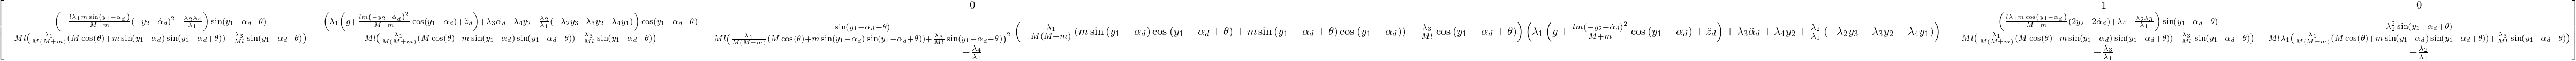

In [77]:
# Linearization
F = Matrix([y1dot,y2dot,y3dot])
y =  Matrix([y1, y2, y3])

# F = F.subs({alpha_d: 0., alphadot_d: 0., alphaddot_d: 0.}).evalf()
jac = F.jacobian(y)
jac

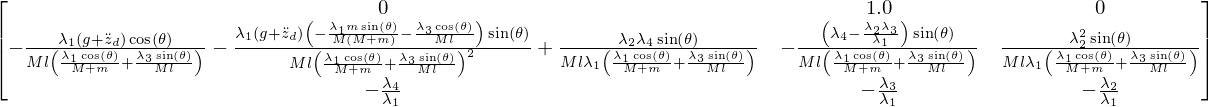

In [88]:
lin = jac.subs({y1:0, y2:0, y3:0}).evalf()
lin2 = lin.subs({alpha_d: 0., alphadot_d: 0., alphaddot_d: 0.}).evalf()
lin2
# F.subs({y1:0, y2:0, y3:0,alpha_d: 0., alphadot_d: 0., alphaddot_d: 0.}).evalf()

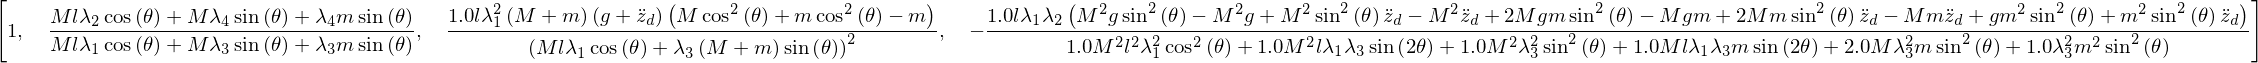

In [85]:
gamma = symbols('\tgamma')
poly = lin2.charpoly(gamma)
coefs = poly.coeffs()
coefs

In [80]:
A21, A22, A23, a, b, c = symbols('A_21 A_22 A_23 a b c')
MM = Matrix([[0,1,10],[A21,A22,A23],[a,b,c]])
MM.charpoly(gamma)

In [81]:
A21 = lin2[1,0]
A22 = lin2[1,1]
A23 = lin2[1,2]
a = lin2[2,0]
b = lin2[2,1]
c = lin2[2,2]

c2 = -(A22 + c)
c1 = c*A22-A21-b*A23
c0 = c*A21 - a*A23


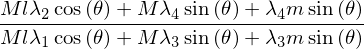

In [82]:
c2 = simplify(c2)
c2

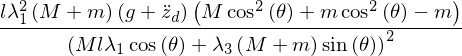

In [83]:
c1 = simplify(c1)
c1

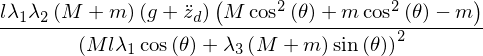

In [84]:
c0 = simplify(c0)
c0